# The Sparks Foundation - GRIPJUNE2021  TASK-1

# STUDENT :- <font color = red> "RASHMI PARDESI" </font>
 

# Predict the percentage of an student based on the no. of study hours.

   ## Importing the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing and understanding the dataset

In [2]:

url= "http://bit.ly/w-data"
df = pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.info() #gives a concise summary of DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Observation - The dataset has 25 rows and 2 columns with 0 null values.

In [6]:
df.describe() #computes a summary of statistics pertaining to the DataFrame columns.

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Extracting 'x' and 'y'

In [7]:
#iloc[] function to work with numeric indexing of the data frame.
x = df.iloc[: , :-1].values
y = df.iloc[: , -1].values
print(x)
print("------------------------------------------------------------------------")
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
------------------------------------------------------------------------
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## Visualizing the data

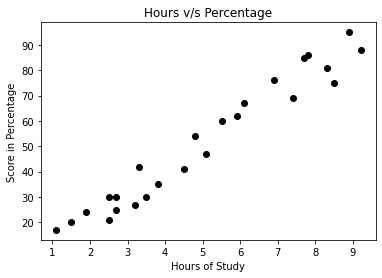

In [8]:
plt.scatter(x,y,color = 'black')
plt.title('Hours v/s Percentage')
plt.xlabel('Hours of Study')
plt.ylabel('Score in Percentage')
plt.show()

### Observation - There is a linear correlation between the study hours and percentage score.

## Splitting the data into training and test set

In [9]:
from sklearn.model_selection import train_test_split as tts
#train_test_split randomly shuffles and divides all rows.
#in order to have same shuffle, same seed value(42 in this case) is given to random_state argument.
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.25, random_state = 42)

## Training and implementing the model

In [10]:
#importing the linear regression model.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train) #train this model by giving x_train and y_train as inputs

LinearRegression()

In [11]:
#prediction of values.
y_pred = lr.predict(x_test) 
print(y_pred)

[83.10733229 26.76559757 26.76559757 69.50760322 59.79351103 28.70841601
 34.53687133]


## Comparing the actual and predicted values

In [12]:
compare = pd.DataFrame({ 'Actual' : y_test, 'Predicted' : y_pred})
print(compare)

   Actual  Predicted
0      81  83.107332
1      30  26.765598
2      21  26.765598
3      76  69.507603
4      62  59.793511
5      25  28.708416
6      42  34.536871


## Visualizing the predicted output

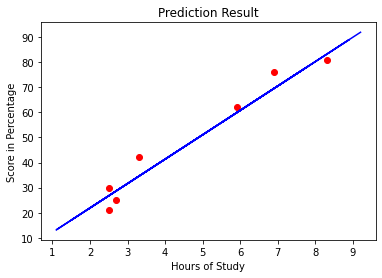

In [13]:
plt.scatter(x_test, y_test, color='red') #plotting the data-points.
plt.plot(x_train, lr.predict(x_train), color='blue') #plotting the prediction line.
plt.title('Prediction Result')
plt.xlabel('Hours of Study')
plt.ylabel('Score in Percentage')
plt.show()

## Model evaluation

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("R^2 score:",r2_score(y_test, y_pred))

Mean Absolute Error: 4.425394675156183
Mean Squared Error: 23.516396034595225
R^2 score: 0.9553509219739938


## Q. :-  What will be predicted score if a student studies for 9.25 hrs/ day?

In [15]:
hours = float(input('Enter the number of study hrs/day: '))
pred  = lr.predict([[hours]])
print('Predicted Percentage: %.2f ' %(pred))

Enter the number of study hrs/day: 9.25
Predicted Percentage: 92.34 


# Conclusion :-
## 1. A student will score 92.336% if he/she studies for 9.25 hrs/day.
## 2. The r^2 value for this Linear Regression model is 0.95535.